## LAB 1 - REGRESIÓN LOGISTICA

## Nombre:
### - Rosalía Reynaga Funes


Deben realizar un en entrenamiento por medio de una regresión logística para definir ayudar a la clasificación de un proceso de vinos.

Se desea clasificar los vinos en "aptos para la venta" (Calidad igual o superior a 8) y "no aptos para la venta" (calidad inferior a 8).


- Realizen el entrenamiento con un 70% de los datos y utilicen el 30% para el test.

- Modificando los parámetros encuentren el mejor desempeño posible y realicen una prueba independiente para tres muestras (ingresando características clasificar la muestra).



In [1]:
# Importamos las librerias de OpenCV y Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# --- Acceder a los datos
data = pd.read_csv('winequality-red.csv')

# --- Visualizar datos automaticamente
data.tail()
#--------------------------------------------------------

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
X_o = data.values[:,0:11]
print(X_o)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [4]:
Class1_size = (data[data["quality"] >= 8]).shape[0] #aptos para la venta
Class2_size = (data[data["quality"] < 8]).shape[0] #NO aptos para la venta

In [5]:
z = np.zeros(Class1_size) # Resultados de la primera clase
o = np.ones(Class2_size) # Resultados de la segunda clase
Y_o = np.concatenate((o, z), axis=0).reshape(X_o.shape[0],1) # Definir las clases resultantes

In [6]:
# --- Inserte código aqui
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(X_o, Y_o, test_size = 0.3, random_state = 42)

#--------------------------------------------------------

In [7]:
print(X)

[[ 8.6   0.22  0.36 ...  3.47  0.87 11.  ]
 [12.5   0.46  0.63 ...  2.99  0.87 10.2 ]
 [ 7.2   0.54  0.27 ...  3.39  0.71 11.  ]
 ...
 [ 7.2   0.62  0.06 ...  3.51  0.54  9.5 ]
 [ 7.9   0.2   0.35 ...  3.32  0.8  11.9 ]
 [ 5.8   0.29  0.26 ...  3.39  0.54 13.5 ]]


In [8]:
X = np.hstack((np.ones((len(X),1)),X)) #agregamos una columna de unos al inicio
X_test= np.hstack((np.ones((len(X_test),1)),X_test))
print(X_test)

[[ 1.    7.7   0.56 ...  3.24  0.66  9.6 ]
 [ 1.    7.8   0.5  ...  3.39  0.48  9.5 ]
 [ 1.   10.7   0.67 ...  3.28  0.98  9.9 ]
 ...
 [ 1.    6.7   0.46 ...  3.39  0.6  10.6 ]
 [ 1.   10.5   0.51 ...  3.09  0.66 11.8 ]
 [ 1.    9.9   0.5  ...  3.34  0.52 10.  ]]


#### Regresion 

In [9]:
# --- Coeficientes de regresion
#en esta regresion el w debe ser igual a la cantidad de caracteristcas es decir w = [5] vectpr de tamaño 5
w = np.zeros(X.shape[1]).reshape(X.shape[1],1)

#-------Parametros de entrenamiento
n=0.000001 #->dato variable
epochs=10000
N=float(len(Y))

#-------Parametros de error
Error = [0]*epochs
T = np.arange(1,epochs+1)
#print(w)

#### Entrenamiento

In [10]:
for i in range(epochs):
    Y_score=np.dot(X,w) #score
    Y_prob=1/(1+np.exp(-Y_score.astype(float))) #probabilidad 
    Log_lik = -(1- Y)* Y_score - np.log(1 + np.exp(-Y_score.astype(float)))
    cost = np.sum(Log_lik)/X.shape[0] #costo
    Error[i]=cost #costo
    der_w= np.dot(X.T,(Y- Y_prob)) #Derivada de w X.T -> 
    w = w + n*der_w #Gradiente descendiente

In [11]:
print(w)

[[ 0.02395747]
 [ 0.33650746]
 [ 0.01566283]
 [ 0.00207294]
 [ 0.02937212]
 [ 0.00345789]
 [-0.1355321 ]
 [ 0.04616013]
 [ 0.02395769]
 [ 0.07495879]
 [ 0.00990659]
 [ 0.21821813]]


#### Grafica del error

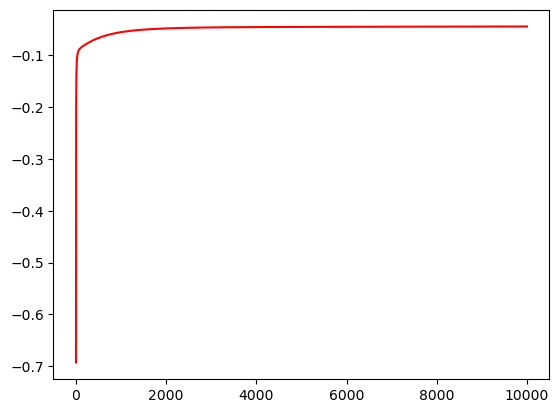

Valor maximo del error: -0.04396026312534532


In [12]:
plt.plot(T,Error,'-r')
plt.show()
Max_E = max(Error)
print("Valor maximo del error: "+str(Max_E))

#### Definicion y pred

In [14]:
#Columan de ka ckase
Y_prediction= np.zeros((Y_prob.shape[0],1))

for i in range (Y_prob.shape[0]):
    if Y_prob[i,0] <= 0.5:
        Y_prediction[i,0]=0
    else:
        Y_prediction[i,0]=1
        
prob_train= float(1-sum(abs(Y-Y_prediction))/Y.shape[0])*100;
print('Precision con datos de entrenamiento: '+str(prob_train)+'%')
    

Precision con datos de entrenamiento: 99.01697944593387%


In [15]:
Y_score_test = np.dot(X_test, w)
Y_prob_test = 1/(1 + np.exp(-Y_score_test.astype(float)))
Y_prediction_test = np.zeros((Y_prob_test.shape[0],1))
for i in range (Y_prob_test.shape[0]):
    if Y_prob_test[i, 0]<= 0.5:
        Y_prediction_test[i, 0] = 0
    else:
        Y_prediction_test[i, 0] = 1
        
prob_test = float(1-sum(abs(Y_test - Y_prediction_test))/Y_test.shape[0])*100
print('Precision con datos de entrenamiento: '+str(prob_test) + '%')

Precision con datos de entrenamiento: 98.54166666666667%


###  prueba independiente para tres muestras

Tomamos 3 filas de la matriz X_test 

In [25]:
test1=(X_test[1])
test2=(X_test[2])
test3=(X_test[3])

In [26]:
#Calculamos el score 
#wt * h(x)
score1T=np.sum(w.T*test1)
score2T=np.sum(w.T*test2)
score3T=np.sum(w.T*test3)

In [29]:
#Aplicamos la funcion sigmoide
sigm1T=1/(1+np.exp(-score1T))
sigm2T=1/(1+np.exp(-score2T))
sigm3T=1/(1+np.exp(-score3T))
print('Primer testeo'sigm1T,sigm2T,sigm3T)

0.9990152496411864 0.99559460834835 0.9762502177876693


Comparamos los resultados optenidos con las respuestas

In [33]:
print('Primer testeo:',sigm1T, ' Y_test[1]:', Y_test[1])

Primer testeo: 0.9990152496411864  Y_test[1]: [1.]


In [34]:
print('Segundo testeo:',sigm2T, ' Y_test[2]:', Y_test[2])

Segundo testeo: 0.99559460834835  Y_test[2]: [1.]


In [35]:
print('Tercer testeo:',sigm3T, ' Y_test[3]:', Y_test[3])

Tercer testeo: 0.9762502177876693  Y_test[3]: [1.]
